<a href="https://colab.research.google.com/github/pratimatamra60/BADS_ex_sol/blob/main/2_BADS_ex_descriptive_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/2_ex_descriptive_analytics.ipynb) 

# BADS Exercise 2 on the foundations of descriptive analytics
The second exercise comprises one more task to advance your skills in Python programming. It's main focus is on cluster analysis.

## 1. Further exercises on Python programming
The following exercise tasks revisit some concepts covered in [Tutorial 1 on Python programming](https://github.com/Humboldt-WI/bads/blob/master/tutorials/1_nb_python_intro.ipynb) 

### Using inbuilt functions and libraries
In Python and other programming language, we use inbuilt functions all the time. Libraries like `NumPy` and `Pandas`, which offer a ton of functionality for handling and analyzing data, are the main reason why the Python language is such a good fit for data science. Let's practice our ability to access libraries and use their functions with some concrete tasks.

The density of the normal distribution with mean $\mu$ and variance $\sigma$ is given as
$$f(x | \mu ,\sigma ^{2}) = {\frac {1}{\sqrt {2\sigma ^{2}\pi}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

Let's create a nice plot of the bell curve that is so famous and characteristic for the normal distribution. Below, we already made sure that relevant libraries are imported. First, define two variables that store the two parameters of the normal distribution; no need to spill out these parameters, right? Next generate some values $x$. Say you want to plot the bell curve for $x \in \{-3, 3\} $. Use the `NumPy` function `linespace()` for this purpose. 

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# define parameters
a = 1
b = 1

# generate some x values
# you can control the number of generated points with the `num` argument
x = np.linspace(start = -3,
                stop  = 3,
                num   = 1000)

Then, for each value of $x$, compute the probability that a normally distributed random variable would be arbitrarily close to that value. To calculate the probability density of the normal distribution, you can use the function `norm.pdf`. The function is part of the *stats models library*, which we import below. So you can write something like `stats.norm.pdf(...)` where ... stands for the arguments that the function requires. Make sure to store the results of the computation in a variable **nvValues**.

In [48]:

nvValues = stats.norm.pdf(x=x, loc=0, scale=1)

We are now ready to plot. Create a simple graph of **nvValues** against **x** using the `plot()`function. Let's say you want your line to be in red color. Use the help and web search to find out how to plot a red line. Also make sure to label your axes; remember: never create a plot without axis labels.

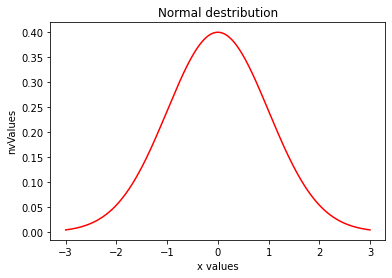

In [49]:
# Implementation of matplotlib function
	
import numpy as np
	
plt.plot(x, nvValues, c='red')
plt.title('Normal destribution')
# naming the x axis
plt.xlabel('x values')
# naming the y axis
plt.ylabel('nvValues')
plt.draw()
#plt.show()
#plt.plot(x, y, color = 'black',linestyle = 'dashed')


## 2. Exercises on descriptive analytics
The following exercise tasks revisit some concepts covered in [Tutorial 2 on descriptive analytics](https://github.com/Humboldt-WI/bads/blob/master/tutorials/2_nb_descriptive_analytics.ipynb). 

### 2.1 Data generation
We want to revisit kMeans and need some data for this purpose. Make use of the function `make_blobs()`, which is part of the `sklearn` library to generate some artificial data. Say we want to **create data with 4 clusters**. Make sure to configure the `make_blobs()` function appropriately. 

In [50]:
# Generate data for clustering
#from sklearn.datasets import make_blobs
#X, y = make_blobs(n_samples = 1000, centers = 1,2,3,4,
 #              cluster_std = 4) # n_samples: It signifies the number of samples(row) we want in our dataset. By default it is set to 100
                                                # n_features: It signifies the number of features(columns) we want in our dataset. By default it is set to 20
                                                # centers: It signifies the number of center of clusters we want in the final dataset.
                                                # cluster_std: It signifies the standard deviation of the clusters.


# import library
from sklearn.datasets import make_blobs

# define parameters of the data to be generated
n       = 1000                             # no. samples
centers = [(0, 0), (5, 5), (0, 4), (4, 0)] # centers of each cluster
std     = 0.75                             # standard deviaton

# Call the function and obtain your data
X, y = make_blobs(n_samples    = n, 
                  centers      = centers, 
                  cluster_std  = std,
                  random_state = 2020)
 



## 2.2 kMeans
The second tutorial provided a *from scratch implementation* of the kMeans algorithm. Go back to the tutorial and copy/paste the relevant parts of the code into this notebook. This will allow you to run the algorithm here.

In [51]:
# The following functions are copy/pasted from the kMeans from scratch notebook

def euclidean_distance(a, b):
    """Computes Euclidean distance between two arrays"""
    return np.sqrt(np.sum((a - b)**2))


def label_cluster(n_samples, clusters):
    """each sample will get the label of the cluster it was assigned to"""
    # creates empty array as long as samples for future labels
    labels = np.empty(n_samples)  

    for cluster_idx, cluster in enumerate(clusters):
        # assign labels to each sample
        for sample_index in cluster:
            labels[sample_index] = cluster_idx  
    return labels


def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroids to create clusters"""
    clusters = [[] for _ in range(K)]  # creates a list of K number of lists
    for idx, sample in enumerate(X):
        # find closest centroid for each sample
        centroid_idx = find_closest_centroid(sample, centroids)
        # create index list of closest centroids
        clusters[centroid_idx].append(idx)
    return clusters


def find_closest_centroid(sample, centroids):
    """Distance from each sample to every centroid"""
    # calculate distance from each sample to each centroid
    distances = [euclidean_distance(sample, point) for point in centroids]  
    # take closest centroid (one with minimal distance)
    closest_index = np.argmin(distances)
    return closest_index


def update_centroids(X, K, n_features, clusters):
    """Assign mean value of cluster features to each centroid"""
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        # find new centroid by finding mean of all points assigned to centroid
        cluster_mean = np.mean(X[cluster, :], axis=0)
        centroids[cluster_idx] = cluster_mean  # collect all centroids
    return centroids


def is_converged(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    # check distance between old and new centroids
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(K)]
    # return Boolean indicating whether centroids are the same as before or not
    return sum(distances) == 0


def KMeans_single(X, K=5, max_iters=100):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape

    # Initialization
    # take random sample points to be initial clusters
    random_sample_idx = np.random.choice(n_samples, K, replace=False)
    # label these points as centroids
    centroids = [X[idx] for idx in random_sample_idx]

    iteration_num = 0  # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):

        iteration_num += 1  # track iterations required

        # assignment to closest centroids (cluster creation)
        clusters = create_clusters(K, X, centroids)

        centroids_old = centroids  # archive previous centroids
        centroids = update_centroids(
            X, K, n_features, clusters)  # Updating centroids

       # Convergence Confirmation
        # check if last iteration's centroids were the same as current iteration
        if is_converged(centroids_old, centroids, K):
            break  # exit loop since there was no change since last iteration

    # Clustering has converged or we have hit the max number of iteration:
    # Determine current cluster solution
    # classify samples as the index of their clusters
    labels = label_cluster(n_samples, clusters)
    # get distance from each point to its centroid
    dist = [euclidean_distance(X[row_num], centroids[int(labels[row_num])])
            for row_num in range(X.shape[0])]
    # total distance calculated as sum of squares
    total_dist = np.sum(np.square(dist))

    # Classify samples as the index of their clusters
    return labels, iteration_num, centroids, total_dist


def KMeans_from_scratch(data, k_clusters, n_iter=10):

    for i in range(n_iter):

        # run KMeans once
        labels, iteration_num, centroids, dist = KMeans_single(
            data, K=k_clusters)

        # save results if they are the best so far
        if 'best_dist' not in locals() or dist < best_dist:

            best_labels = labels
            best_iter = iteration_num
            best_centroids = centroids
            best_dist = dist

    return best_labels, best_iter, best_centroids, best_dist


Test the implementation by clustering the data created in 2.1 above. We know the data has 4 clusters, so feel free to set $k=4$. 

In [52]:
# Clustering of the artificial data
cluster_solution = KMeans_from_scratch(data=X, k_clusters=4, n_iter=10)


total Distance: 1065.7981726983346
Iterration: 7
Centroids: [[ 3.98469055e+00  3.06224857e-03]
 [ 5.00648156e+00  4.94152400e+00]
 [ 9.19575528e-03  4.05888714e+00]
 [-2.36289039e-02 -1.91701992e-02]]


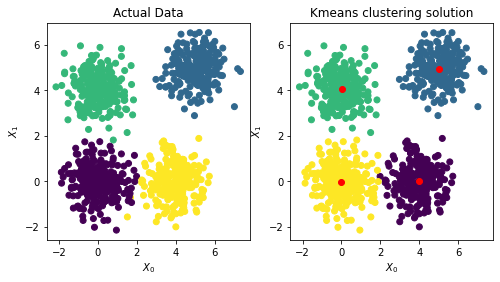

In [53]:
import matplotlib.pyplot as plt

#print information about the clustering results. They are the returns of the funtion kmean_from_scratch
#Information 1: how it looks like
#print(cluster_solution) 
#Information 2: data is type of cluster_solution
type(cluster_solution)
#Information 3: 
print("total Distance:", cluster_solution[3])
print("Iterration:", cluster_solution [1])
print("Centroids:", cluster_solution[2])
plt.figure(figsize= (8,4))
#plt.subplot(nrows=1, nclos=2, index=1)
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("Actual Data")

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=cluster_solution[0])
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("Kmeans clustering solution")
plt.scatter(cluster_solution[2] [:,0], cluster_solution[2] [:,1], c='red')
plt.show()

## 2.3 Distance function
In the lecture, we argued that clustering methods and kMeans are versatile in that the support various distance measures. Let's convince ourself that this is true. Your task is to write a custom function that calculates **cosine similarity**. You can look up the formula of the cosine similarity in the lecture slides of chapter 2, or from the Internet. 

In [54]:
x = np.array([3, 2, 0, 5 ]) # The ‘x’ vector has values, 
y = np.array([1, 0, 0, 0 ]) # The ‘y’ vector has values,

#The formula for calculating the cosine similarity is : Cos(x, y) = x . y / ||x|| * ||y||
def cosine_similarity(x,y):

 # product = np.sum(x*y)
  #sum_x_sq = np.sum(np.square(x))
  # length_of_x = np.sqrt(sum_x_sq)   #||x|| = √ (3)^2 + (2)^2 + (0)^2 + (5)^2 = 6.164
  # length_of_y = np.sqrt(np.sum(np.square(y)))  # ||y|| = √ (1)^2 + (0)^2 + (0)^2 + (0)^2 = 1
  # cross_product_of_two_vectors = length_of_x * length_of_y   # 0.49 
  result = np.sum(x*y) / ((np.sqrt(np.sum(np.square(x))))*(np.sqrt(np.sum(np.square(y)))))
  
  return (result)

cosine_similarity(x, y)


# define a function that computes cosine distance
def cosine_distance(x, y):
    '''Computes the Cosine distance between two numpy arrays'''
    return 1 - cosine_similarity(x, y)



x = np.array([3, 2, 0, 5 ]) # The ‘x’ vector has values, 
y = np.array([1, 0, 0, 0 ]) # The ‘y’ vector has values,

#The formula for calculating the cosine similarity is : Cos(x, y) = x . y / ||x|| * ||y||
def cosine_similarty(x,y):

 # product = np.sum(x*y)
  #sum_x_sq = np.sum(np.square(x))
  # length_of_x = np.sqrt(sum_x_sq)   #||x|| = √ (3)^2 + (2)^2 + (0)^2 + (5)^2 = 6.164
  # length_of_y = np.sqrt(np.sum(np.square(y)))  # ||y|| = √ (1)^2 + (0)^2 + (0)^2 + (0)^2 = 1
  # cross_product_of_two_vectors = length_of_x * length_of_y   # 0.49 
  result = np.sum(x*y) / ((np.sqrt(np.sum(np.square(x))))*(np.sqrt(np.sum(np.square(y)))))
  
  return (result)

cosine_similarty(x, y)




0.48666426339228763

In [55]:
# define a function that computes cosine distance
def cosine_distance(x, y):
    '''Computes the Cosine distance between two numpy arrays'''
    return 1 - cosine_similarity(x, y)

cosine_distance(x,y)

0.5133357366077124

In [56]:
from scipy.spatial import distance #????
print(distance.cosine(x, y))

# test function
x = np.array([1, 0.1])
y = np.array([1, 0.5])
cosine_distance(x, y) == distance.cosine(x, y)


0.5133357366077124


True

Solution from proffesor

# define a function that computes cosine similarity
def cosine_similarity(a, b):
    '''Computes the Cosine similarity between two numpy arrays'''
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

cosine_similarity(a, b)

Next thing to do is to change the above from scratch implementation of the kMeans algorithm such that it uses your cosine similarity function for clustering the data. It might be better to copy/past the full kMeans code one more time because this will allow you to have both versions, with Euclidean distance and cosine similarity, in the notebook. This makes it easier to re-run the clustering in case you need or want to.

In [57]:
# pick no. of clusters
# randomly pick centroids
# for each data point, find closet centroid
# update each centroid given current clustering
# keep going until stopping criterion is met

def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroid to create clusters"""
    clusters = [[] for _ in range(K)]  # creates a list of K number of lists
    for idx, sample in enumerate(X):
        # find closest centroid for each sample
        centroid_idx = find_closest_centroid_cosine(sample, centroids)
        # create index list of closest centroids
        clusters[centroid_idx].append(idx)
    return clusters

def find_closest_centroid_cosine(sample, centroids):
    """Distance from each sample to every centroid"""
    # calculate distance from each sample to each centroid
    distances = [cosine_distance(sample, point) for point in centroids]  
    # take closest centroid (one with minimal distance)
    closest_index = np.argmin(distances)
    return closest_index

def is_converged(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    # check distance between old and new centroids
    distances = [cosine_distance(centroids_old[i], centroids[i]) for i in range(K)]
    # return Boolean indicating whether centroids are the same as before or not
    return sum(distances) == 0


def KMeans_single(X, K=5, max_iters=100):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape

    # Initialization
    # take random sample points to be the initial clusters
    random_sample_idx = np.random.choice(n_samples, K, replace=False)
    # label these points as centroids
    centroids = [X[idx] for idx in random_sample_idx]

    iteration_num = 0  # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):

        iteration_num += 1  # track iterations required

        # assignment to closest centroids (cluster creation)
        clusters = create_clusters(K, X, centroids)

        centroids_old = centroids  # archive previous centroids
        centroids = update_centroids(
            X, K, n_features, clusters)  # Updating centroids

       # Convergence Confirmation
        # check if last iteration's centroids were the same as current iteration
        if is_converged(centroids_old, centroids, K):
            break  # exit loop since there was no change since last iteration

    # Clustering has converged or we have hit the max number of iteration:
    # Determine current cluster solution
    # classify samples as the index of their clusters
    labels = label_cluster(n_samples, clusters)
    # get distance from each point to its centroid
    dist = [cosine_distance(X[row_num], centroids[int(labels[row_num])])
            for row_num in range(X.shape[0])]
    # total distance calculated as sum of squares
    total_dist = np.sum(np.square(dist))

    # Classify samples as the index of their clusters
    return labels, iteration_num, centroids, total_dist


def KMeans_from_scratch(data, k_clusters, n_iter=10):

    for i in range(n_iter):

        # run KMeans once
        labels, iteration_num, centroids, dist = KMeans_single(
            data, K=k_clusters)

        # save results if they are the best so far
        if 'best_dist' not in locals() or dist < best_dist:

            best_labels = labels
            best_iter = iteration_num
            best_centroids = centroids
            best_dist = dist

    return best_labels, best_iter, best_centroids, best_dist


In [45]:
# Create cluster solution with the modified kMeans
modified_cluster_solution= KMeans_from_scratch(data=X, k_clusters=4, n_iter=3)

## 2.4 New clustering solution
The last task on the list is to apply the altered kMeans with cosine similarity to your synthetic data set. Try to come up with a suitable way to compare the results of the two versions of kMeans. It is natural to ask how the cluster solutions differ when using Euclidean distance or cosine similarity. How would you answer that question? Make use of your Python skills to come up with an answer.

In [62]:
# Write some code to compare the two cluster solutions from using Euclidean distance and cosine similarity 

print("Total distance cosine ", modified_cluster_solution[3])
print("Total distance Euclidean ", cluster_solution[3])

print("No. iterations cosine ", modified_cluster_solution[1])
print("No. iterations Euclidean ", cluster_solution[1])

print("Centroids cosine", modified_cluster_solution[2])
print("Centroids Euclidean", cluster_solution[2])

Total distance cosine  15.852332426747818
Total distance Euclidean  1065.7981726983346
No. iterations cosine  100
No. iterations Euclidean  7
Centroids cosine [[ 3.31419152 -0.11528326]
 [-0.604224   -0.44707247]
 [-0.09532208  3.40536577]
 [ 4.47382201  4.40126889]]
Centroids Euclidean [[ 3.98469055e+00  3.06224857e-03]
 [ 5.00648156e+00  4.94152400e+00]
 [ 9.19575528e-03  4.05888714e+00]
 [-2.36289039e-02 -1.91701992e-02]]


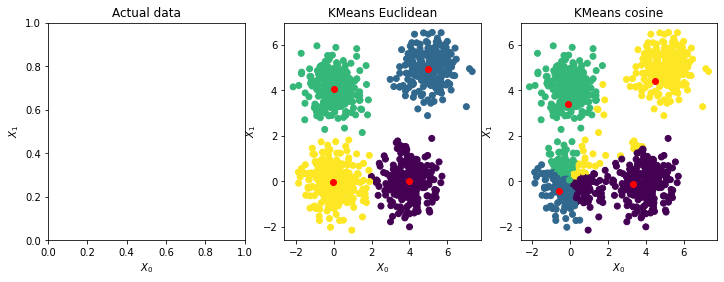

In [65]:
# visual comparison of Euclidean to cosine distance

plt.figure(figsize=(12, 4))
plt.subplot(131)
#plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("Actual data")

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=cluster_solution[0])
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("KMeans Euclidean")
plt.scatter(cluster_solution[2][:,0], cluster_solution[2][:,1], c='red')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=modified_cluster_solution[0])
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("KMeans cosine")
plt.scatter(modified_cluster_solution[2][:,0], modified_cluster_solution[2][:,1], c='red')

plt.show()

total Distance: 1065.7981726983346
Iterration: 7
Centroids: [[ 3.98469055e+00  3.06224857e-03]
 [ 5.00648156e+00  4.94152400e+00]
 [ 9.19575528e-03  4.05888714e+00]
 [-2.36289039e-02 -1.91701992e-02]]
total Distance: 15.852332426747818
Iterration: 100
Centroids: [[ 3.31419152 -0.11528326]
 [-0.604224   -0.44707247]
 [-0.09532208  3.40536577]
 [ 4.47382201  4.40126889]]


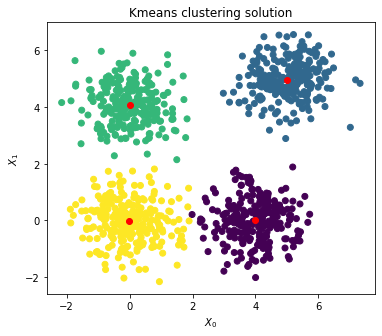

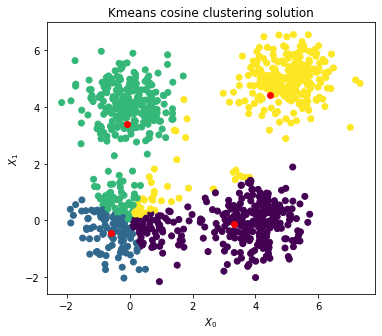

In [67]:
# 1 compare distance, iteration and centroids value of Kmeans with eucidine and cosine 
print("total Distance:", cluster_solution[3])
print("Iterration:", cluster_solution [1])
print("Centroids:", cluster_solution[2])

print("total Distance:", modified_cluster_solution[3])
print("Iterration:", modified_cluster_solution [1])
print("Centroids:", modified_cluster_solution[2])
plt.figure(figsize = [20, 5])
# 2 plot both clusters to compare
# kmeans with eucidine plot
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=cluster_solution[0])
plt.title("Kmeans clustering solution")

plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.scatter(cluster_solution[2] [:,0], cluster_solution[2] [:,1], c='red')
plt.show()

#kmeans with cosine plot
#------------------------------------
plt.figure(figsize = [20, 5])

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=modified_cluster_solution[0])
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.title("Kmeans cosine clustering solution")
plt.scatter(modified_cluster_solution[2][:,0], modified_cluster_solution[2][:,1], c='red')
#------------------------------------


plt.show()

## 2.5 Further tasks
Still not enough? Ok, that is great! Here are a few ideas for some more tasks associated with kMeans and the scope of this exercise.
- Write a custom function calculating the city-block or Manhatten metric
- Improve the from scratch implementation of kMeans such that it supports the caller to specify the desired distance function as an argument
- The above changes should enable you to flexibly run kMeans with Euclidean, cosine, and city-block distance. Try that out using your synthetic data
- Use the `sklearn` function `make_classification()` to generate a more challenging data and apply kMeans to it. You can use your customer implementation of kMeans or the one available in `sklearn`
- Run a web-search for the **IRIS data set**. It is a very well known data set. Quickly familiarize yourself with the data. Afterwards, load it using the function `sklearn.datasets.load_iris()`. Check whether kMeans is able to identify the three types of iris flowers. 

In [68]:
import numpy as np
  
def cityblock_distance(a, b):
  
    result = np.sum([abs(a - b) for (a, b) in zip(a, b)])
    return result
  
array1 = [10,30]
array2 = [50,70]
  
result = cityblock_distance(array1, array2)
  
print("The CityBlock distance between 2 arrays is:", result)

The CityBlock distance between 2 arrays is: 80


In [69]:
arr1 = [ 10, 30 ]
arr2 = [ 50, 70 ]
n = len(arr1)
def manhatan_matric_distance(x, y, n):
 
    sum = 0
     
    # for each point, finding distance
    # to rest of the point

    for i in range(n):
      for j in range(n):
        sum+=(abs(x[i]-x[j])+ abs(y[i]-y[j]))

    return sum
     
 

result_manhatan = manhatan_matric_distance(arr1, arr2, n)

In [78]:
# kmeans with cityblock distance

def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroid to create clusters"""
    clusters = [[] for _ in range(K)]  # creates a list of K number of lists
    for idx, sample in enumerate(X):
        # find closest centroid for each sample
        centroid_idx = find_closest_centroid_cosine(sample, centroids)
        # create index list of closest centroids
        clusters[centroid_idx].append(idx)
    return clusters

def find_closest_centroid_cityblock(sample, centroids):
    """Distance from each sample to every centroid"""
    distances = [cityblock_distance(sample, point) for point in centroids] # calculate distance from each sample to each centroid
    closest_index = np.argmin(distances) # take closest centroid (one with minimal distance)
    return closest_index

def is_converged(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    # check distance between old and new centroids
    distances = [cityblock_distance(centroids_old[i], centroids[i]) for i in range(K)]
    # return Boolean indicating whether centroids are the same as before or not
    return sum(distances) == 0


def KMeans_single(X, K=5, max_iters=100):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape

    # Initialization
    # take random sample points to be the initial clusters
    random_sample_idx = np.random.choice(n_samples, K, replace=False)
    # label these points as centroids
    centroids = [X[idx] for idx in random_sample_idx]

    iteration_num = 0  # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):

        iteration_num += 1  # track iterations required

        # assignment to closest centroids (cluster creation)
        clusters = create_clusters(K, X, centroids)

        centroids_old = centroids  # archive previous centroids
        centroids = update_centroids(
            X, K, n_features, clusters)  # Updating centroids

       # Convergence Confirmation
        # check if last iteration's centroids were the same as current iteration
        if is_converged(centroids_old, centroids, K):
            break  # exit loop since there was no change since last iteration

    # Clustering has converged or we have hit the max number of iteration:
    # Determine current cluster solution
    # classify samples as the index of their clusters
    labels = label_cluster(n_samples, clusters)
    # get distance from each point to its centroid
    dist = [cityblock_distance(X[row_num], centroids[int(labels[row_num])])
            for row_num in range(X.shape[0])]
    # total distance calculated as sum of squares
    total_dist = np.sum(np.square(dist))

    # Classify samples as the index of their clusters
    return labels, iteration_num, centroids, total_dist


def KMeans_from_scratch(data, k_clusters, n_iter=10):

    for i in range(n_iter):

        # run KMeans once
        labels, iteration_num, centroids, dist = KMeans_single(
            data, K=k_clusters)

        # save results if they are the best so far
        if 'best_dist' not in locals() or dist < best_dist:

            best_labels = labels
            best_iter = iteration_num
            best_centroids = centroids
            best_dist = dist

    return best_labels, best_iter, best_centroids, best_dist


In [79]:
# kmeans with manhatan_matric_distance

def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroid to create clusters"""
    clusters = [[] for _ in range(K)]  # creates a list of K number of lists
    for idx, sample in enumerate(X):
        # find closest centroid for each sample
        centroid_idx = find_closest_centroid_cosine(sample, centroids)
        # create index list of closest centroids
        clusters[centroid_idx].append(idx)
    return clusters

def find_closest_centroid_manhatan(sample, centroids):
    """Distance from each sample to every centroid"""
    distances = [cityblock_distance(sample, point) for point in centroids] # calculate distance from each sample to each centroid
    closest_index = np.argmin(distances) # take closest centroid (one with minimal distance)
    return closest_index

def is_converged(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    # check distance between old and new centroids
    distances = [manhatan_matric_distance(centroids_old[i], centroids[i]) for i in range(K)]
    # return Boolean indicating whether centroids are the same as before or not
    return sum(distances) == 0


def KMeans_single(X, K=5, max_iters=100):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape

    # Initialization
    # take random sample points to be the initial clusters
    random_sample_idx = np.random.choice(n_samples, K, replace=False)
    # label these points as centroids
    centroids = [X[idx] for idx in random_sample_idx]

    iteration_num = 0  # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):

        iteration_num += 1  # track iterations required

        # assignment to closest centroids (cluster creation)
        clusters = create_clusters(K, X, centroids)

        centroids_old = centroids  # archive previous centroids
        centroids = update_centroids(
            X, K, n_features, clusters)  # Updating centroids

       # Convergence Confirmation
        # check if last iteration's centroids were the same as current iteration
        if is_converged(centroids_old, centroids, K):
            break  # exit loop since there was no change since last iteration

    # Clustering has converged or we have hit the max number of iteration:
    # Determine current cluster solution
    # classify samples as the index of their clusters
    labels = label_cluster(n_samples, clusters)
    # get distance from each point to its centroid
    dist = [manhatan_matric_distance(X[row_num], centroids[int(labels[row_num])])
            for row_num in range(X.shape[0])]
    # total distance calculated as sum of squares
    total_dist = np.sum(np.square(dist))

    # Classify samples as the index of their clusters
    return labels, iteration_num, centroids, total_dist


def KMeans_from_scratch(data, k_clusters, n_iter=10):

    for i in range(n_iter):

        # run KMeans once
        labels, iteration_num, centroids, dist = KMeans_single(
            data, K=k_clusters)

        # save results if they are the best so far
        if 'best_dist' not in locals() or dist < best_dist:

            best_labels = labels
            best_iter = iteration_num
            best_centroids = centroids
            best_dist = dist

    return best_labels, best_iter, best_centroids, best_dist


# Done... puh, that was a lot of work. And you did it! Congratulations!!! 